In [1]:
# set up jupyter
from IPython.display import display, Markdown # pretty display
from IPython.core.interactiveshell import InteractiveShell # multi output

InteractiveShell.ast_node_interactivity = 'all' # type: ignore

In [2]:
# import packages
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from utils.plotter import Plotter # type: ignore

In [3]:
# get preprocessed data
data = pd.read_csv("./dataset/preprocessed.csv") # type: ignore
Markdown("# Preprocessed data")
display(data)

# Preprocessed data

,Avg Bwd Segment Size,Average Packet Size,Down/Up Ratio,Packet Length Variance,Packet Length Std,Max Packet Length,Bwd Packet Length Std,Bwd Packet Length Mean,Bwd Packet Length Min,Bwd Packet Length Max,Source Port,Label
0,0.000000,0.00356,0.000000,0.0,0.0,0.000514,0.0,0.000000,0.00000,0.000000,0.006760,0.0
1,0.001034,0.00356,0.142857,0.0,0.0,0.000514,0.0,0.001034,0.00411,0.000514,0.001221,0.0
2,0.001034,0.00356,0.142857,0.0,0.0,0.000514,0.0,0.001034,0.00411,0.000514,0.001221,0.0
3,0.001034,0.00356,0.142857,0.0,0.0,0.000514,0.0,0.001034,0.00411,0.000514,0.006760,0.0
4,0.000000,0.00356,0.000000,0.0,0.0,0.000514,0.0,0.000000,0.00000,0.000000,0.006760,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
225740,0.001034,0.00356,0.142857,0.0,0.0,0.000514,0.0,0.001034,0.00411,0.000514,0.001221,0.0
225741,0.001034,0.00356,0.142857,0.0,0.0,0.000514,0.0,0.001034,0.00411,0.000514,0.001221,0.0
225742,0.001034,0.00356,0.142857,0.0,0.0,0.000514,0.0,0.001034,0.00411,0.000514,0.001221,0.0
225743,0.000000,0.00356,0.000000,0.0,0.0,0.000514,0.0,0.000000,0.00000,0.000000,0.001221,0.0


In [4]:
# prep data
labels = data['Label']
features = data .drop('Label', axis = 1)

# splits
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=0)

In [5]:
# create plotter for test results
plotter = Plotter(y_test)

In [6]:
# dataset is very imbalanced, oversample to address this
oversampler = SMOTE(random_state=0)
smote_x, smote_y = oversampler.fit_resample(x_train, y_train) # type: ignore

# Results: Decision Tree

[[24418    26]
 [   18 31975]]
Accuracy:  0.9992203696156776
Precision:  0.9991875253898316
Recall:  0.9994373769262026


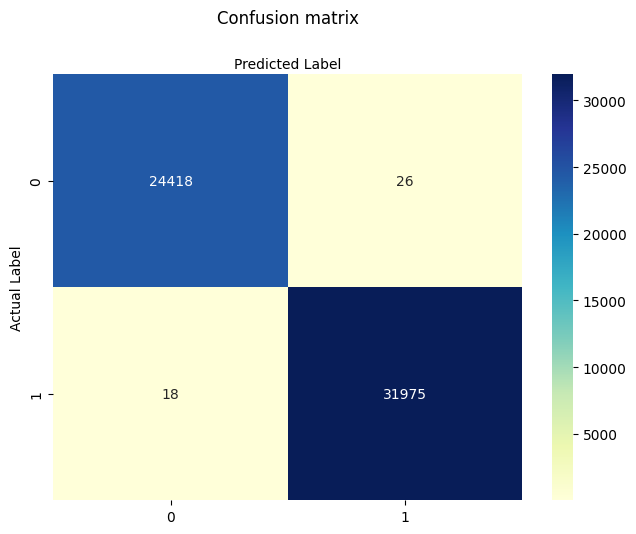

In [7]:
# train and test decision tree
dtc = DecisionTreeClassifier().fit(smote_x, smote_y)
dtc_pred = dtc.predict(x_test)
Markdown("# Results: Decision Tree")
plotter(dtc_pred)

# Results: Random Forest

[[24421    23]
 [   22 31971]]
Accuracy:  0.9992026507433067
Precision:  0.9992811152091017
Recall:  0.9993123495764699


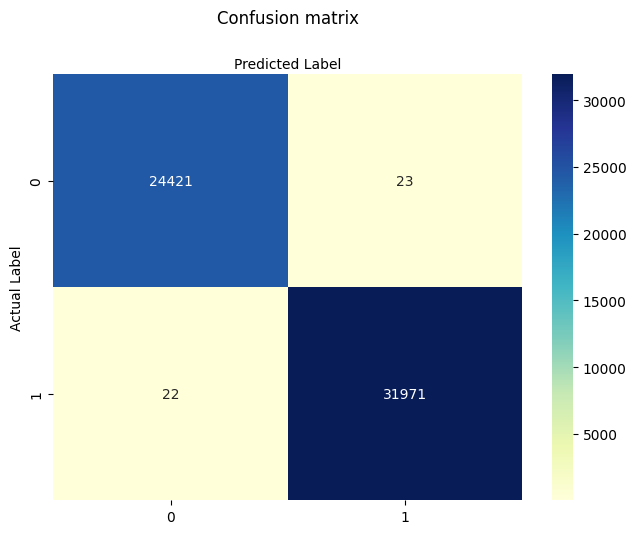

In [8]:
# train and test random forest
rfc = RandomForestClassifier().fit(smote_x, smote_y)
rfc_pred = rfc.predict(x_test)
Markdown("# Results: Random Forest")
plotter(rfc_pred)

# Results: Gradient Boosting

[[24429    15]
 [   44 31949]]
Accuracy:  0.9989545865301133
Precision:  0.9995307220623201
Recall:  0.9986246991529397


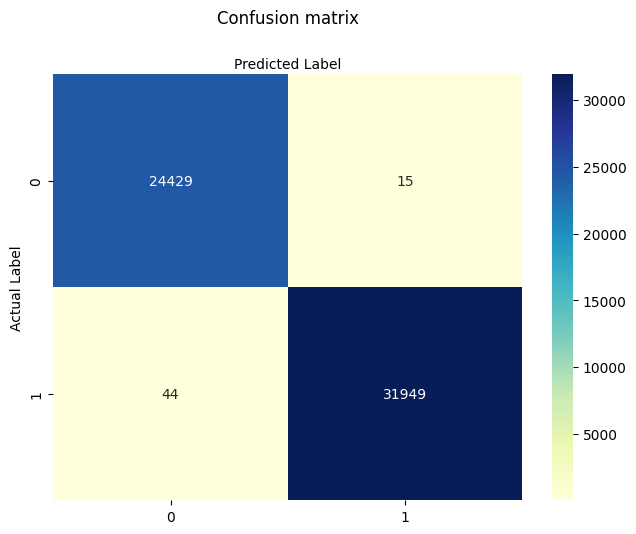

In [9]:
# train and test gradient boosting
gbc = GradientBoostingClassifier().fit(smote_x, smote_y)
gbc_pred = gbc.predict(x_test)
Markdown("# Results: Gradient Boosting")
plotter(gbc_pred)